In [3]:
%config IPCompleter.greedy=True

In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
glass=pd.read_csv("Data/glassClass.csv")

In [7]:
glass.head(8)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1


In [8]:
X = glass.drop("Type", axis=1) #predictors
Y = glass["Type"] #predictor

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state=25) #20% hold out for testing

In [10]:
#instantiate learning model ( k = 3 )
knn = KNeighborsClassifier(n_neighbors=3)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [12]:
# predict the response
Y_pred = knn.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Y_pred)
confusion_matrix

array([[ 9,  2,  1,  0,  0,  0],
       [ 5, 13,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  6]])

In [16]:
print accuracy_score(y_test,Y_pred)

0.720930232558


### Parameter tuning with cross-validation

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
#create list of k/neighbors for kNN
myList = list(range(1,50))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors =k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


/opt/conda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The optimal number of neighbors is 1


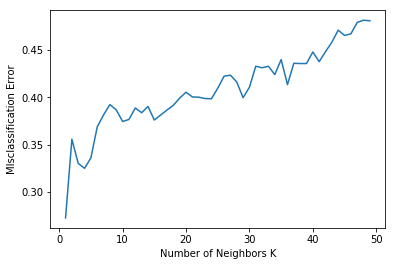

In [19]:
#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determing best k
optimal_k = myList[(MSE.index(min(MSE)))]
print "The optimal number of neighbors is %d" % optimal_k

#Plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('MIsclassification Error')
plt.show()